In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [394]:
x,y = make_blobs(n_samples = 500 , n_features = 2 ,centers = 5 , random_state = 3)

In [395]:
y

array([3, 2, 1, 3, 3, 1, 4, 3, 2, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 2, 0, 0,
       3, 1, 3, 0, 4, 4, 1, 4, 3, 4, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 4, 4,
       1, 2, 2, 1, 4, 4, 2, 3, 4, 3, 3, 0, 3, 3, 2, 1, 2, 1, 1, 3, 4, 2,
       1, 1, 0, 1, 0, 3, 0, 3, 0, 1, 3, 4, 0, 0, 1, 0, 1, 4, 2, 4, 1, 2,
       4, 1, 4, 0, 3, 0, 0, 2, 3, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 3,
       2, 4, 3, 2, 1, 0, 2, 4, 0, 1, 2, 1, 4, 3, 0, 4, 4, 4, 3, 3, 1, 1,
       3, 2, 2, 4, 1, 4, 1, 3, 3, 0, 1, 2, 4, 3, 2, 2, 3, 1, 3, 3, 1, 1,
       2, 0, 0, 4, 1, 3, 0, 2, 4, 0, 2, 0, 2, 0, 0, 0, 4, 3, 0, 2, 0, 4,
       3, 1, 2, 4, 2, 3, 2, 0, 4, 4, 0, 3, 1, 2, 0, 1, 4, 3, 4, 0, 1, 4,
       3, 3, 3, 0, 0, 2, 3, 4, 4, 3, 2, 3, 3, 3, 0, 2, 1, 2, 3, 3, 2, 4,
       1, 4, 4, 0, 3, 1, 3, 1, 4, 0, 1, 1, 3, 0, 3, 0, 1, 2, 1, 0, 0, 2,
       3, 3, 1, 1, 0, 2, 0, 3, 4, 2, 4, 3, 4, 4, 4, 4, 2, 0, 2, 3, 0, 2,
       4, 1, 2, 2, 2, 4, 3, 3, 1, 0, 0, 2, 1, 1, 3, 1, 4, 1, 2, 2, 4, 3,
       0, 4, 4, 2, 0, 3, 1, 0, 1, 4, 1, 1, 2, 3, 0,

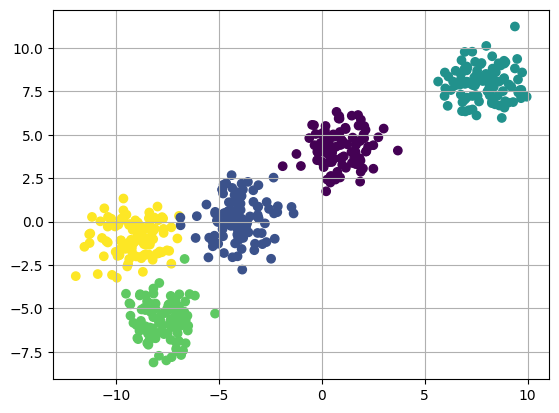

In [396]:
plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [397]:
k=5

colors = ['Yellow', 'green' , 'blue' , 'orange' , 'red']

clusters = {}

for indx in range(k):
    center = 10*(2*np.random.random((x.shape[1],)))
    points = []
    cluster = {
        'center' : center,
        'points' : [],
        'colors': colors[indx]
    }

    clusters[indx] = cluster

In [398]:
clusters

{0: {'center': array([18.04019634, 16.08883244]),
  'points': [],
  'colors': 'Yellow'},
 1: {'center': array([0.48185067, 7.72054336]),
  'points': [],
  'colors': 'green'},
 2: {'center': array([12.54807956, 12.67955631]),
  'points': [],
  'colors': 'blue'},
 3: {'center': array([15.27540377, 13.12579235]),
  'points': [],
  'colors': 'orange'},
 4: {'center': array([3.96304811, 0.32829129]), 'points': [], 'colors': 'red'}}

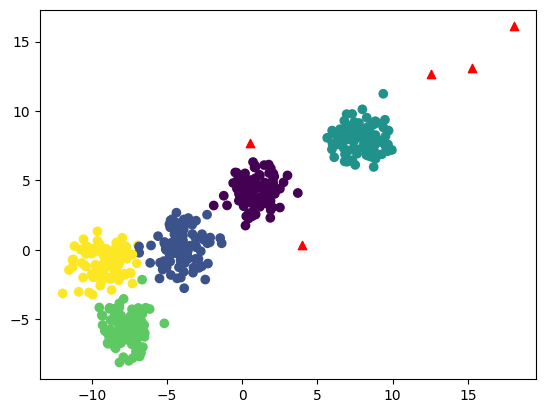

In [399]:
plt.scatter(x[:, 0] , x[: , 1] , c=y)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0] , center[1] , marker = '^' , c = 'red' )

plt.show()

In [400]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))


In [401]:
a = np.array([1,2])
b = np.array([3,4])
distance(a,b)

2.8284271247461903

#### $Implementing$ $E$ $Step$

In [402]:
def assign_clusters():
    # E-Step
    for idx in range(x.shape[0]):
        dist = []
        curr_x = x[idx]
        
        for i in range(k):
            d = distance(curr_x,clusters[i]['center'])
            dist.append(d)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)


# M step 


def update_clusters():

    for i in range(k):
        pnts = np.array(clusters[i]['points'])

        if pnts.shape[0] >0:
            new_center = pnts.mean(axis=0) ## taking mean column wise i.e all x axis mean and all y axis mean separately
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []


def plotClusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:, 0], pts[:, 1], c=clusters[i]['colors'])
        except Exception as e:
            print(f"Error plotting points for cluster {i}: {e}")
            pass
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], c='black', marker='^')




        

Error plotting points for cluster 0: too many indices for array: array is 1-dimensional, but 2 were indexed
Error plotting points for cluster 3: too many indices for array: array is 1-dimensional, but 2 were indexed


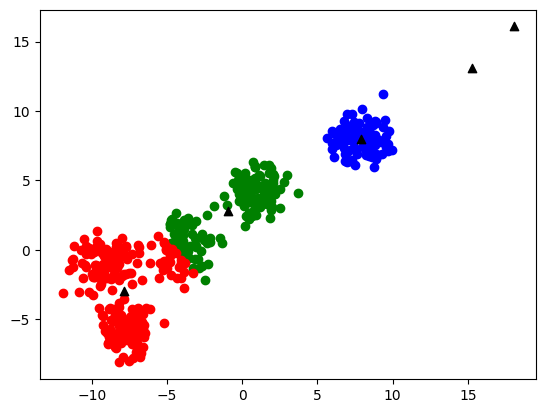

In [415]:
assign_clusters()
plotClusters()
update_clusters()

In [414]:
# points = np.array(clusters[1]['points'])
# points.shape[0]

# clusters[1]['center']

# points[0][1]
